### Analysis of Highly Rated Papers Discussing LLMs Limitations over the Total Number of Papers that Discuss LLMs



#### Analysis of ACL Papers 
This visualization provides a comprehensive analysis of the trends in academic publications discussing limitations of Large Language Models (LLMs). It contrasts the total number of papers per quarter with the fraction of those papers that are highly rated (rating 4 or 5) and specifically address LLM limitations. This helps in understanding not only the volume of research focused on LLMs over time but also the quality and relevance of discussions around their limitations.

- **Grey Columns**: Represent the total number of papers talking about Large Language Models published each quarter.
- **Blue Scatter Line**: Shows the fraction of these papers that are highly rated and discuss LLM limitations, providing insight into the depth of research concerning LLM limitations in high-quality publications.


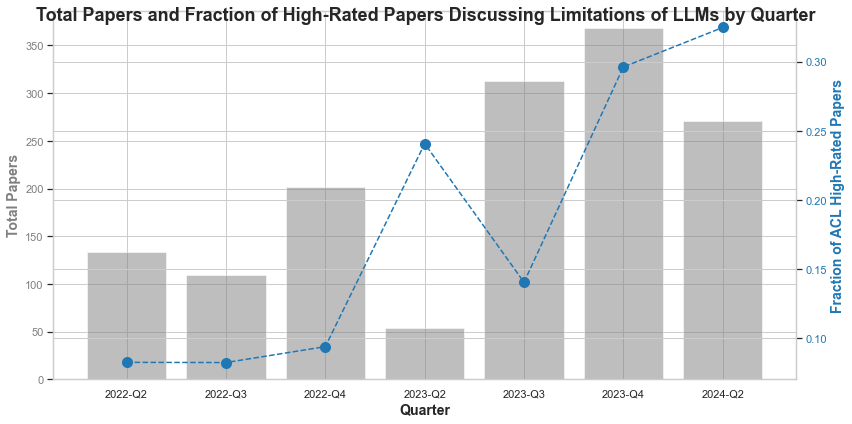

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results_time_series_acl_all_papers.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['Talks about LLMs'] = df['Talks about LLMs'].str.strip().str.replace(r'\.$', '', regex=True).fillna('No')
df = df.dropna(subset=['Year', 'Month'])
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce').fillna(0).astype(int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
df['Month'] = df['Month'].str.strip()
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
total_papers = {}
talk_about_limitations = {}
high_rating_papers = {}
for _, row in df_filtered.iterrows():
    year_quarter = row['Year-Quarter']
    total_papers[year_quarter] = total_papers.get(year_quarter, 0) + 1
    if row['Talks about LLMs'] == 'Yes' and row['Rate'] >= 4:
        high_rating_papers[year_quarter] = high_rating_papers.get(year_quarter, 0) + 1

summary = pd.DataFrame({
    'Year-Quarter': total_papers.keys(),
    'total_papers': total_papers.values(),
    'high_rating_papers': [high_rating_papers.get(yq, 0) for yq in total_papers.keys()]
})
summary['fraction_high_rating'] = summary['high_rating_papers'] / summary['total_papers']
summary = summary.sort_values(by='Year-Quarter')
year_quarter_np = summary['Year-Quarter'].to_numpy()
total_papers_np = summary['total_papers'].to_numpy()
fraction_high_rating_np = summary['fraction_high_rating'].to_numpy()

fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:gray'
ax1.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Papers', fontsize=14, fontweight='bold', color=color)
ax1.bar(year_quarter_np, total_papers_np, color=color, alpha=0.5, label='Total Papers')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fraction of ACL High-Rated Papers', fontsize=14, fontweight='bold', color=color)
ax2.scatter(year_quarter_np, fraction_high_rating_np, color=color, s=100, label='Fraction of High-Rated Papers')
ax2.plot(year_quarter_np, fraction_high_rating_np, color=color, linestyle='--', linewidth=1.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.suptitle('Total Papers and Fraction of High-Rated Papers Discussing Limitations of LLMs by Quarter', fontsize=18, fontweight='bold')
plt.show()


##### Second option showing only the trend scatter line 

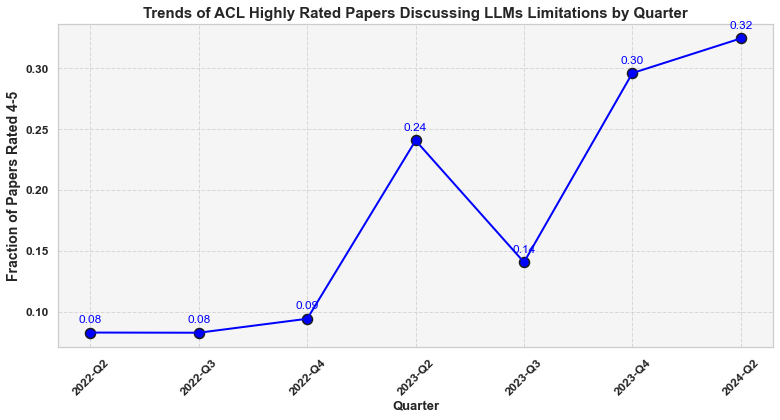

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results_time_series_acl_all_papers.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['Talks about LLMs'] = df['Talks about LLMs'].str.strip().str.replace(r'\.$', '', regex=True).fillna('No')
df = df.dropna(subset=['Year', 'Month'])
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce').fillna(0).astype(int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
df['Month'] = df['Month'].str.strip()
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df = df.dropna(subset=['Quarter'])
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
total_papers = {}
talk_about_limitations = {}
high_rating_papers = {}

for _, row in df_filtered.iterrows():
    year_quarter = row['Year-Quarter']
    if year_quarter not in total_papers:
        total_papers[year_quarter] = 0
        talk_about_limitations[year_quarter] = 0
        high_rating_papers[year_quarter] = 0
    
    total_papers[year_quarter] += 1
    if row['Talks about LLMs'] == 'Yes':
        talk_about_limitations[year_quarter] += 1
    if row['Rate'] >= 4:
        high_rating_papers[year_quarter] += 1
summary = pd.DataFrame({
    'Year-Quarter': total_papers.keys(),
    'total_papers': total_papers.values(),
    'talk_about_limitations': talk_about_limitations.values(),
    'high_rating_papers': high_rating_papers.values()
})
summary['fraction_talk_about_limitations'] = summary['talk_about_limitations'] / summary['total_papers']
summary['fraction_high_rating'] = summary['high_rating_papers'] / summary['total_papers']
summary_split = summary['Year-Quarter'].str.split('-', expand=True)
summary['Year'] = pd.to_numeric(summary_split[0], errors='coerce').astype(int)
summary['Quarter'] = summary_split[1]
summary['Quarter'] = pd.Categorical(summary['Quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
summary = summary.sort_values(by=['Year', 'Quarter'])
summary[['fraction_talk_about_limitations', 'fraction_high_rating']] = summary[['fraction_talk_about_limitations', 'fraction_high_rating']].fillna(0)
plt.figure(figsize=(11, 6))
sns.set(style="whitegrid")
year_quarter_np = summary['Year-Quarter'].to_numpy()
fraction_high_rating_np = summary['fraction_high_rating'].to_numpy()
plt.scatter(year_quarter_np, fraction_high_rating_np, color='blue', s=100, edgecolor='k', linewidth=1.5)
plt.plot(year_quarter_np, fraction_high_rating_np, color='blue', linestyle='-', linewidth=2)

for i, (x, y) in enumerate(zip(year_quarter_np, fraction_high_rating_np)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='blue')
plt.title('Trends of ACL Highly Rated Papers Discussing LLMs Limitations by Quarter', fontsize=15, fontweight='bold')
plt.xlabel('Quarter', fontsize=13, fontweight='bold')
plt.ylabel('Fraction of Papers Rated 4-5', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f5f5f5')
plt.tight_layout()
plt.show()


# Analyzing Limitations in Highly-Rated Papers on Large Language Models (LLMs) 

## Purpose
This script aims to analyze and identify the main limitations discussed in highly-rated academic papers focusing on Large Language Models (LLMs). By extracting, clustering, and visualizing the key limitations from the abstracts of these papers, we aim to provide a comprehensive overview of the recurring issues and challenges associated with LLMs.

## Steps and Methodology

### Data Loading and Preparation
- Load the dataset containing papers from the sources, focusing on those with high ratings (4 and 5).
- Filter the dataset to include only highly-rated papers to ensure the analysis is based on significant and impactful research.

### Text Preprocessing
- Clean the text data by removing stopwords, custom noise words, and applying lemmatization to reduce words to their base forms.
- Create a document-term matrix to prepare the text data for topic modeling.

### Topic Modeling
- Apply Latent Dirichlet Allocation (LDA) to identify clusters of keywords that represent different topics discussed in the papers.
- Extract the top keywords from each topic to understand the main themes.

### Visualization
- Generate word clouds for each topic to visually represent the main keywords and their importance.
- Display the word clouds along with the list of keywords for each topic.

### General Limitations Analysis
- Aggregate the keywords from all topics to identify the most frequently mentioned limitations across the papers.
- Summarize and interpret the general limitations to provide a comprehensive overview.

## Outcome
The notebook produces visual and textual representations of the key limitations discussed in highly-rated LLM papers. This includes word clouds for each identified topic and a consolidated list of general limitations.


C:\Users\User\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0:
adversarial real world real factual downstream better structure test world data


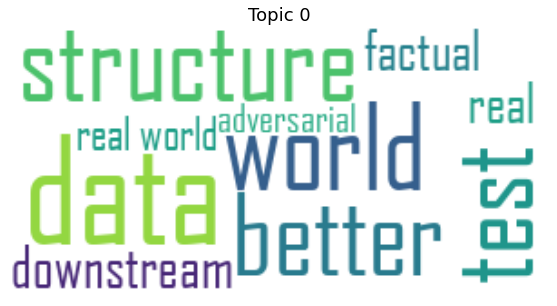

Topic 1:
consistently resulting update complex fact logical llm struggle struggle reasoning llm


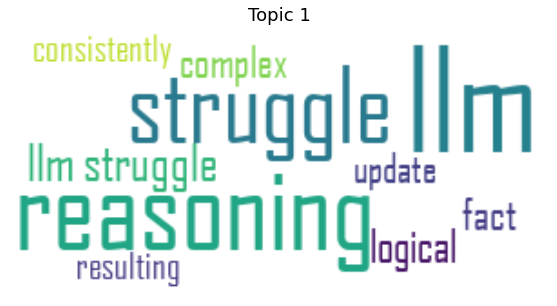

Topic 2:
research concern social issue risk hallucination recent text bias llm


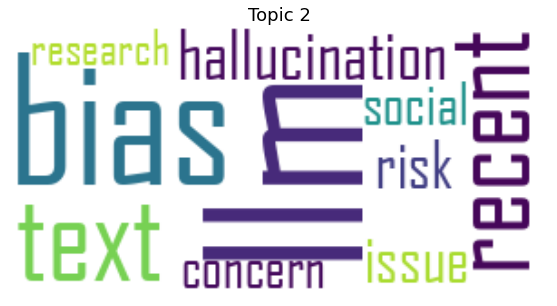

Topic 3:
significantly reasoning learning ability result context task human performance llm


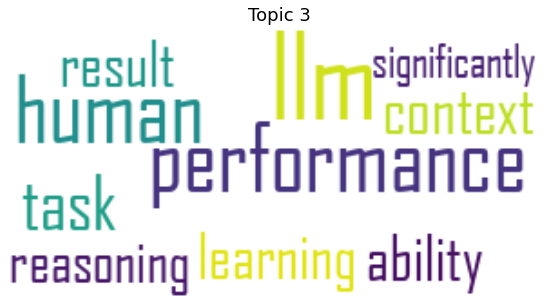

Topic 4:
harmful examines paper stereotype critically perpetuating stereotype perpetuating persona indicate prompt


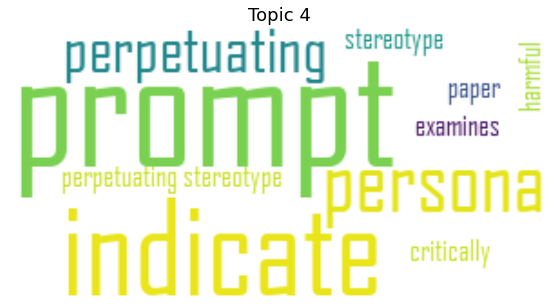

Topic 5:
output future hallucination despite challenge performance error limitation significant llm


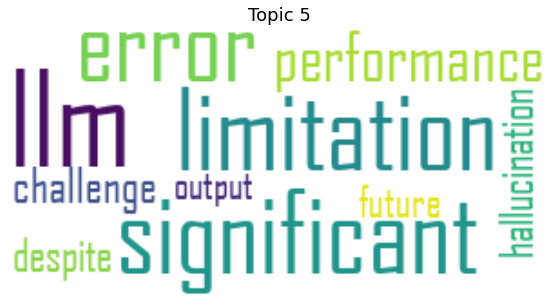

Topic 6:
domain fail training performance superficial cue chatgpt task plms cue superficial


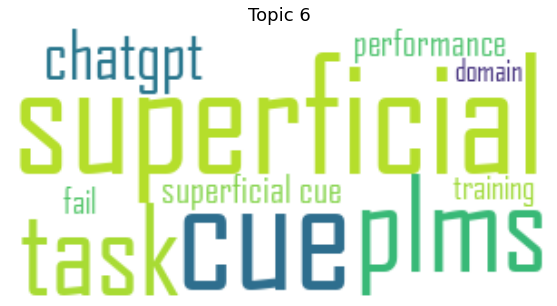

Topic 7:
practice wrong correctly current question correctly approach size different question answer


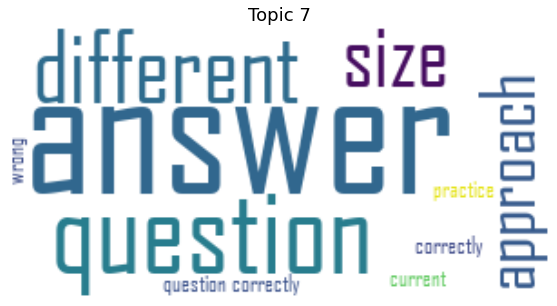

General Limitations from Highly-Rated Papers:
llm: 173.5440191605088
bias: 65.03463828798068
performance: 36.350736870789696
hallucination: 29.999627233233582
text: 25.259579827939696
recent: 23.890036828439463
reasoning: 23.33740766667465
human: 23.00196114624069
risk: 19.316645939237905
issue: 18.94720529542748
social: 18.269970219455608
task: 17.5215929873179
concern: 16.853020385134673
research: 16.15264299339906
significant: 11.504500214071536
limitation: 11.169490365011212
context: 11.063919782682747
struggle: 10.871140078434992
llm struggle: 10.280354982993586
result: 10.074371508820073


In [1]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

file_path = 'results_time_series_acl_all_papers.csv'
df = pd.read_csv(file_path) 
df = df[df['Rate'].isin([4, 5])]
custom_stopwords = {
    'language', 'model', 'models', 'using', 'study', 'analysis', 'approach', 
    'large', 'however', 'methods', 'often', 'tasks', 'knowledge', 'including', 
    'remain', 'remains', 'generate', 'generated', 'generating'
}
stop_words = set(stopwords.words('english')).union(custom_stopwords)
lemmatizer = WordNetLemmatizer()

df['cleaned_text'] = df['Evidence'].fillna("").apply(
    lambda x: ' '.join([
        lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x.lower()) 
        if word.isalpha() and word not in stop_words and len(word) > 3
    ])
)
# document term creation
vectorizer = CountVectorizer(max_df=0.85, min_df=2, stop_words='english', ngram_range=(1, 3))
data_vectorized = vectorizer.fit_transform(df['cleaned_text'])

lda_model = LatentDirichletAllocation(n_components=8, learning_method='online', random_state=42, max_iter=20)
lda_Z = lda_model.fit_transform(data_vectorized)

def print_topics(model, vectorizer, n_topics=8, n_words=10):
    topics = []
    lemmatizer = WordNetLemmatizer()
    
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}:")
        top_word_indices = topic.argsort()[-n_words:]
        words = vectorizer.get_feature_names_out()
        word_lemma_map = {words[i]: lemmatizer.lemmatize(words[i]) for i in top_word_indices}
        unique_words = list(dict.fromkeys(word_lemma_map.values()))
        unique_word_indices = [i for i in top_word_indices if word_lemma_map[words[i]] in unique_words]
        unique_word_indices = unique_word_indices[:n_words]
        
        word_freqs = {words[i]: topic[i] for i in unique_word_indices}
        topics.append(word_freqs)
        topic_words = [words[i] for i in unique_word_indices]
        print(" ".join(topic_words))
        
        try:
            wordcloud = WordCloud(
                width=300,
                height=150,
                background_color='white',
                font_path='C:/Windows/Fonts/AGENCYR.ttf'
            ).generate_from_frequencies(word_freqs)

            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Topic {idx}', fontsize=18)
            plt.axis("off")
            plt.show()
        except Exception as e:
            print(f"Error generating word cloud for Topic {idx}: {e}")
    return topics

topics = print_topics(lda_model, vectorizer, n_words=10)
general_limitations = Counter()
for topic in topics:
    general_limitations.update(topic)
print("General Limitations from Highly-Rated Papers:")
for keyword, freq in general_limitations.most_common(20):
    print(f"{keyword}: {freq}")


#### Analysis of ArXiv Papers 

First few rows of the dataset:
      Source                                              Title  \
0  arXIv2022  GitHub Copilot AI pair programmer: Asset or Li...   
1  arXIv2022  Compressing Pre-trained Transformers via Low-B...   
2  arXIv2022  Solving Quantitative Reasoning Problems with L...   
3  arXIv2022  Knowledge Distillation of Transformer-based La...   
4  arXIv2022  Bottleneck Low-rank Transformers for Low-resou...   

  Talks about LLMs  Rate                                           Evidence  \
0              No.   1.0  The abstract discusses GitHub Copilot, an AI p...   
1             Yes.   3.0  "the huge size of these models brings signific...   
2             Yes.   3.0  "state-of-the-art models have generally strugg...   
3             Yes.   5.0  "However, the large model size and high run-ti...   
4             Yes.   3.0  "The resulting models are too large for on-edg...   

   Year                  Date  
0  2022  2022-06-30T15:00:03Z  
1  2022  2022-06-30T04:33:5

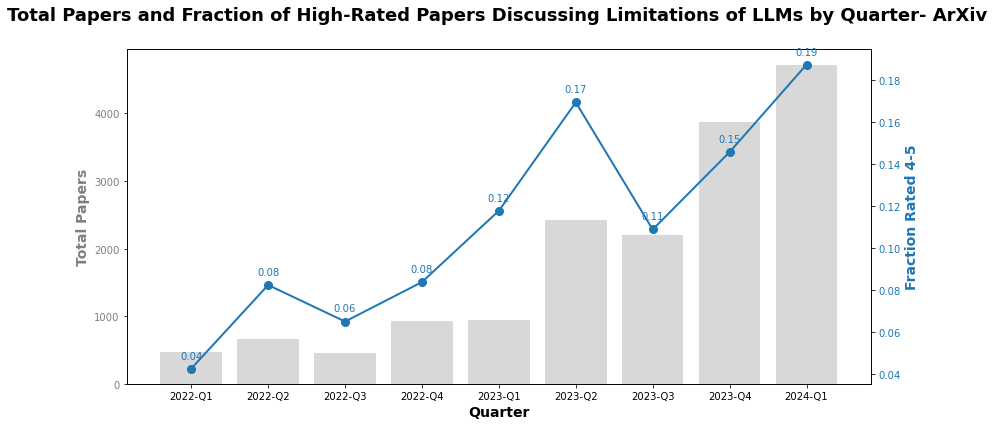

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'results_time_series_arXiv_all_papers.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()
print("First few rows of the dataset:")
print(df.head())
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']
print("First few rows after preprocessing:")
print(df.head())
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
total_papers = df_filtered.groupby('Year-Quarter').size().reset_index(name='total_papers')
high_rated_papers = df_filtered[df_filtered['Rate'] >= 4].groupby('Year-Quarter').size().reset_index(name='high_rated_papers')
summary = pd.merge(total_papers, high_rated_papers, on='Year-Quarter', how='left')
summary['high_rated_papers'] = summary['high_rated_papers'].fillna(0).astype(int)
summary['fraction_high_rating'] = summary['high_rated_papers'] / summary['total_papers']
summary['Year'] = summary['Year-Quarter'].str[:4].astype(int)
summary['Quarter'] = summary['Year-Quarter'].str[-2:]
summary['Quarter'] = pd.Categorical(summary['Quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
summary = summary.sort_values(by=['Year', 'Quarter'])
print("Summary of total and high-rated papers by quarter:")
print(summary)
year_quarter_np = summary['Year-Quarter'].to_numpy()
fraction_high_rating_np = summary['fraction_high_rating'].to_numpy()
total_papers_np = summary['total_papers'].to_numpy()
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:gray'
ax1.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Papers', fontsize=14, fontweight='bold', color=color)
ax1.bar(year_quarter_np, total_papers_np, color=color, alpha=0.3, label='Total Papers')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fraction Rated 4-5', fontsize=14, fontweight='bold', color=color)
ax2.plot(year_quarter_np, fraction_high_rating_np, marker='o', linestyle='-', color=color, linewidth=2, markersize=8, label='Fraction Rated 4-5')
ax2.tick_params(axis='y', labelcolor=color)
for i, (x, y) in enumerate(zip(year_quarter_np, fraction_high_rating_np)):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color=color)
fig.tight_layout()
fig.suptitle('Total Papers and Fraction of High-Rated Papers Discussing Limitations of LLMs by Quarter- ArXiv', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.88)
plt.show()


First few rows of the dataset:
      Source                                              Title  \
0  arXIv2022  GitHub Copilot AI pair programmer: Asset or Li...   
1  arXIv2022  Compressing Pre-trained Transformers via Low-B...   
2  arXIv2022  Solving Quantitative Reasoning Problems with L...   
3  arXIv2022  Knowledge Distillation of Transformer-based La...   
4  arXIv2022  Bottleneck Low-rank Transformers for Low-resou...   

  Talks about LLMs  Rate                                           Evidence  \
0              No.   1.0  The abstract discusses GitHub Copilot, an AI p...   
1             Yes.   3.0  "the huge size of these models brings signific...   
2             Yes.   3.0  "state-of-the-art models have generally strugg...   
3             Yes.   5.0  "However, the large model size and high run-ti...   
4             Yes.   3.0  "The resulting models are too large for on-edg...   

   Year                  Date  
0  2022  2022-06-30T15:00:03Z  
1  2022  2022-06-30T04:33:5

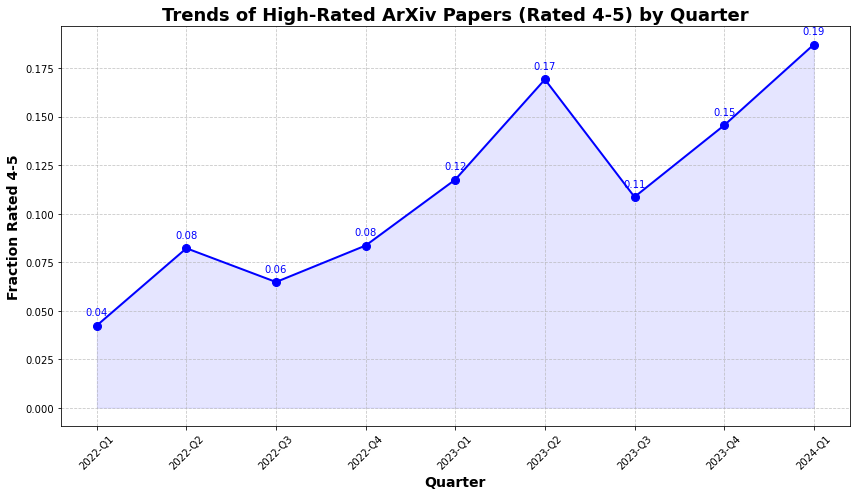

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results_time_series_arXiv_all_papers.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()
print("First few rows of the dataset:")
print(df.head())
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']
print("First few rows after preprocessing:")
print(df.head())
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
total_papers = df_filtered.groupby('Year-Quarter').size().reset_index(name='total_papers')
high_rated_papers = df_filtered[df_filtered['Rate'] >= 4].groupby('Year-Quarter').size().reset_index(name='high_rated_papers')
summary = pd.merge(total_papers, high_rated_papers, on='Year-Quarter', how='left')
summary['high_rated_papers'] = summary['high_rated_papers'].fillna(0).astype(int)
summary['fraction_high_rating'] = summary['high_rated_papers'] / summary['total_papers']
summary['Year'] = summary['Year-Quarter'].str[:4].astype(int)
summary['Quarter'] = summary['Year-Quarter'].str[-2:]
summary['Quarter'] = pd.Categorical(summary['Quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
summary = summary.sort_values(by=['Year', 'Quarter'])

print("Summary of total and high-rated papers by quarter:")
print(summary)

year_quarter_np = summary['Year-Quarter'].to_numpy()
fraction_high_rating_np = summary['fraction_high_rating'].to_numpy()
plt.figure(figsize=(12, 7))
plt.plot(year_quarter_np, fraction_high_rating_np, marker='o', linestyle='-', color='blue', linewidth=2, markersize=8, label='Fraction Rated 4-5')
plt.fill_between(year_quarter_np, fraction_high_rating_np, color='blue', alpha=0.1)

plt.xlabel('Quarter', fontsize=14, fontweight='bold')
plt.ylabel('Fraction Rated 4-5', fontsize=14, fontweight='bold')
plt.title('Trends of ArXiv High-Rated Papers (Rated 4-5) by Quarter', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

for i, (x, y) in enumerate(zip(year_quarter_np, fraction_high_rating_np)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='blue')
    
plt.tight_layout()
plt.show()


#### Bubble Graph Representation
Bubble Size: Represents a third variable, which could be the number of papers or another quantitative measure. Larger bubbles indicate higher values.

First few rows of the dataset:
      Source                                              Title  \
0  arXIv2022  GitHub Copilot AI pair programmer: Asset or Li...   
1  arXIv2022  Compressing Pre-trained Transformers via Low-B...   
2  arXIv2022  Solving Quantitative Reasoning Problems with L...   
3  arXIv2022  Knowledge Distillation of Transformer-based La...   
4  arXIv2022  Bottleneck Low-rank Transformers for Low-resou...   

  Talks about LLMs  Rate                                           Evidence  \
0              No.   1.0  The abstract discusses GitHub Copilot, an AI p...   
1             Yes.   3.0  "the huge size of these models brings signific...   
2             Yes.   3.0  "state-of-the-art models have generally strugg...   
3             Yes.   5.0  "However, the large model size and high run-ti...   
4             Yes.   3.0  "The resulting models are too large for on-edg...   

   Year                  Date  
0  2022  2022-06-30T15:00:03Z  
1  2022  2022-06-30T04:33:5

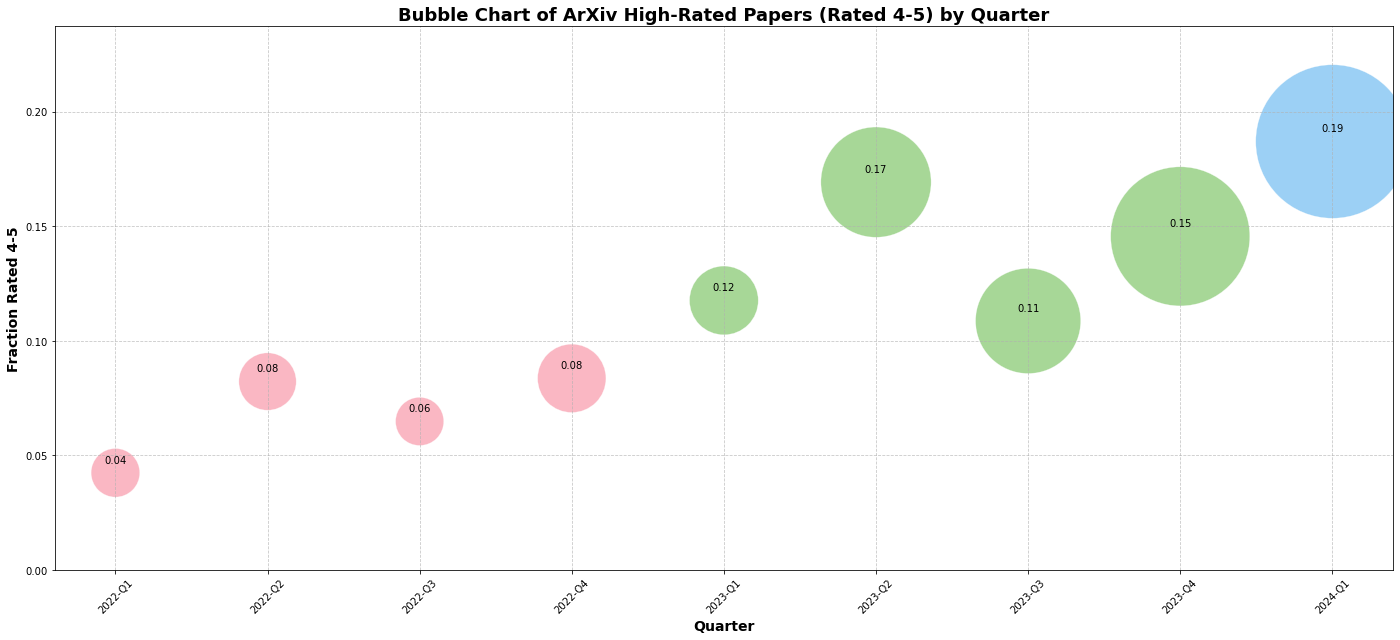

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'results_time_series_arXiv_all_papers.xlsx'
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()

print("First few rows of the dataset:")
print(df.head())

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')
month_to_quarter = {
    'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
    'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
    'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
    'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
}
df['Quarter'] = df['Month'].map(month_to_quarter)
df['Year-Quarter'] = df['Year'].astype(str) + '-' + df['Quarter']

print("First few rows after preprocessing:")
print(df.head())
df_filtered = df[(df['Year'] >= 2022) & (df['Year'] <= 2024)]
total_papers = df_filtered.groupby('Year-Quarter').size().reset_index(name='total_papers')
high_rated_papers = df_filtered[df_filtered['Rate'] >= 4].groupby('Year-Quarter').size().reset_index(name='high_rated_papers')
summary = pd.merge(total_papers, high_rated_papers, on='Year-Quarter', how='left')
summary['high_rated_papers'] = summary['high_rated_papers'].fillna(0).astype(int)
summary['fraction_high_rating'] = summary['high_rated_papers'] / summary['total_papers']
summary['Year'] = summary['Year-Quarter'].str[:4].astype(int)
summary['Quarter'] = summary['Year-Quarter'].str[-2:]
summary['Quarter'] = pd.Categorical(summary['Quarter'], categories=['Q1', 'Q2', 'Q3', 'Q4'], ordered=True)
summary = summary.sort_values(by=['Year', 'Quarter'])

print("Summary of total and high-rated papers by quarter:")
print(summary)

palette = sns.color_palette("husl", len(summary['Year'].unique()))
color_map = {year: palette[i] for i, year in enumerate(summary['Year'].unique())}

plt.figure(figsize=(23, 9))
for year in summary['Year'].unique():
    year_data = summary[summary['Year'] == year]
    plt.scatter(year_data['Year-Quarter'], year_data['fraction_high_rating'], 
                s=year_data['total_papers']*5, alpha=0.5, color=color_map[year], edgecolors='w', linewidth=0.5, label=year)
plt.xlabel('Quarter', fontsize=14, fontweight='bold')
plt.ylabel('Fraction Rated 4-5', fontsize=14, fontweight='bold')
plt.title('Bubble Chart of ArXiv High-Rated Papers (Rated 4-5) by Quarter', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, summary['fraction_high_rating'].max() + 0.05)
for i in range(len(summary)):
    plt.annotate(f'{summary["fraction_high_rating"].iloc[i]:.2f}', 
                 (summary['Year-Quarter'].iloc[i], summary['fraction_high_rating'].iloc[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', fontsize=10, color='black')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


### Analyzing Limitations in ArXiv Highly-Rated Papers on Large Language Models (LLMs) 



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0:
understanding current significant indicate capability result reasoning limitation challenge error


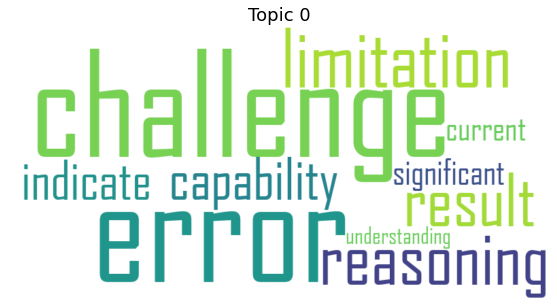

Topic 1:
clinical prediction performance different limitation reveals hallucination evaluation human response


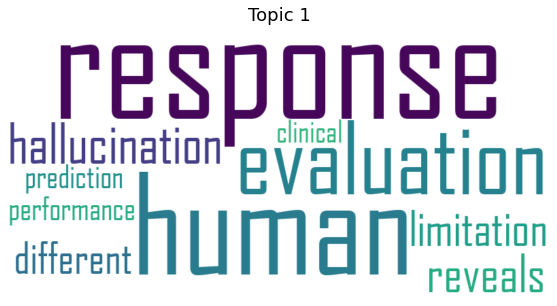

Topic 2:
widespread effect preference bias observe reflect negative adoption inherent frequently


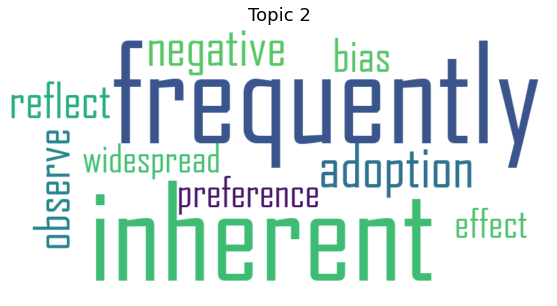

Topic 3:
concern issue training generation result information potential bias challenge context


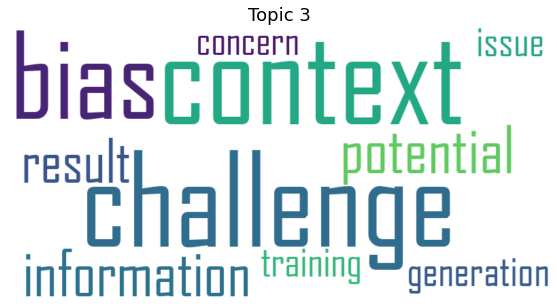

Topic 4:
potentially dialogue context challenging training previous threat scenario prone instruction


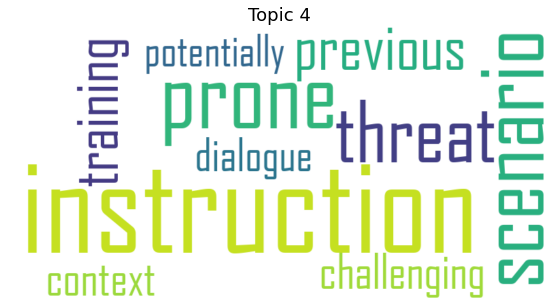

Topic 5:
factual incorrect factually explanation generated known generating information generate content


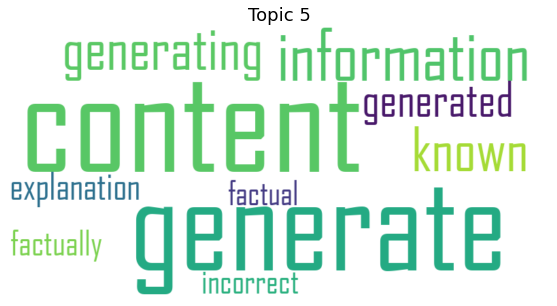

Topic 6:
middle distribution shift utilization revealed retrieval implicit shift solution distribution visual


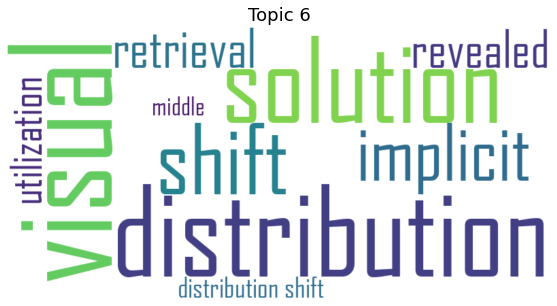

Topic 7:
risk inference adversarial prompt concern training harmful vulnerability safety attack


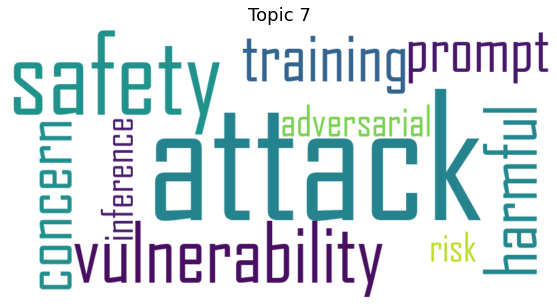

Topic 8:
question benchmark experiment reveal limitation chatgpt problem reasoning capability performance


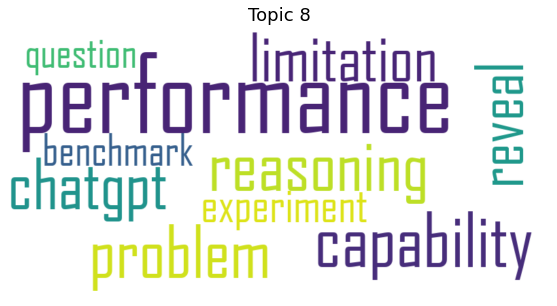

Topic 9:
correct success ability despite struggle agent complex answer hallucination reasoning


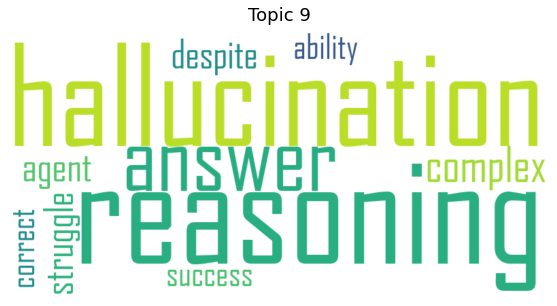

General Limitations from Highly-Rated Papers:
performance: 295.4585051892474
reasoning: 287.9603969170412
challenge: 263.2768382457203
limitation: 227.71162710806476
context: 185.08885369158617
result: 177.955227786423
hallucination: 177.64700442030704
information: 166.27887676523977
training: 165.1565313020846
capability: 164.5355232394403
bias: 141.1504324104415
concern: 133.3198008105345
error: 119.61165349965121
attack: 115.4228552500758
response: 112.99547708432422
potential: 110.64282164838193
safety: 110.44467221554912
generation: 93.11464041216604
problem: 88.65784122085431
answer: 85.67009165494098


In [12]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

file_path = 'results_time_series_arXiv_all_papers.xlsx'
df = pd.read_excel(file_path)
df = df[df['Rate'].isin([4, 5])]
custom_stopwords = {'language', 'model', 'models', 'using', 'study', 'analysis', 'approach', 'large', 'however', 'methods', 'often', 'tasks', 'knowledge', 'including', 'remain', 'remains'}
stop_words = set(stopwords.words('english')).union(custom_stopwords)

lemmatizer = WordNetLemmatizer()
df['cleaned_text'] = df['Evidence'].fillna("").apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x.lower()) if word.isalpha() and word not in stop_words and len(word) > 4])
)
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 2))
data_vectorized = vectorizer.fit_transform(df['cleaned_text'])
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=0)
lda_Z = lda_model.fit_transform(data_vectorized)
def print_topics(model, vectorizer, n_topics=10, n_words=10):
    topics = []
    lemmatizer = WordNetLemmatizer()
    
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}:")
        top_word_indices = topic.argsort()[-n_words:]
        words = vectorizer.get_feature_names_out()
        word_lemma_map = {words[i]: lemmatizer.lemmatize(words[i]) for i in top_word_indices}
        unique_words = list(dict.fromkeys(word_lemma_map.values()))
        unique_word_indices = [i for i in top_word_indices if word_lemma_map[words[i]] in unique_words]
        unique_word_indices = unique_word_indices[:n_words] 
        
        word_freqs = {words[i]: topic[i] for i in unique_word_indices}
        topics.append(word_freqs)
        topic_words = [words[i] for i in unique_word_indices]
        print(" ".join(topic_words))
        
        try:
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',
                font_path='C:/Windows/Fonts/AGENCYR.ttf'
            ).generate_from_frequencies(word_freqs)

            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.title(f'Topic {idx}', fontsize=18)
            plt.axis("off")
            plt.show()
        except Exception as e:
            print(f"Error generating word cloud for Topic {idx}: {e}")
    return topics

topics = print_topics(lda_model, vectorizer, n_words=10)

general_limitations = Counter()
for topic in topics:
    general_limitations.update(topic)
print("General Limitations from Highly-Rated Papers:")
for keyword, freq in general_limitations.most_common(20):
    print(f"{keyword}: {freq}")
